# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\micha\AppData\Local\Temp\ipykernel_30788\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

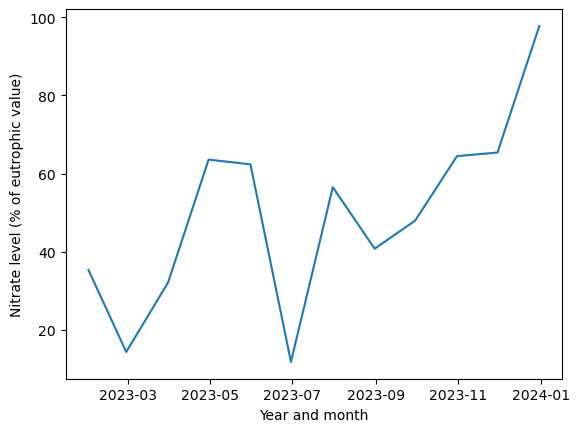

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\micha\AppData\Local\Temp\ipykernel_30788\1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

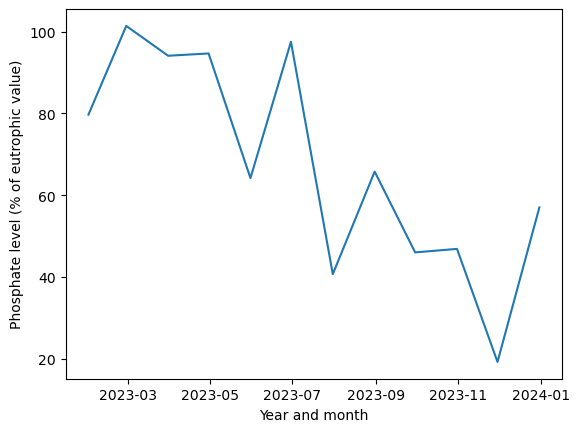

In [4]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

Attribute Suggestions

1. Color: Use a bold or contrasting color for the last three months of data and a muted/grayscale palette for the rest of the data.
2. Size / Line Weight: Thicken the lines or enlarge the data points for the last three months to make them stand out.
3. Position / Layout: Zoom in or position the last three months of data more prominently
4. Data Point Shape: Use different shapes for data points in the last three months (e.g., squares vs. circles).
5. Enclosure: Add a box or shaded background behind the last three months of data to enclose those points visually.

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

In [37]:
df_emissions = pd.read_csv("emissions_high_granularity.csv")
df_fuels = pd.read_csv("all_fuels_data.csv")
df_accidents = pd.read_csv("pipeline_accidents.csv")

### ---- 1. Clean Column Names ---- ###
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()               # Remove leading/trailing spaces
                  .str.lower()               # Lowercase everything
                  .str.replace(" ", "_")     # Replace spaces with underscores
                  .str.replace("-", "_")     # Replace dashes with underscores
    )
    return df

df_emissions = clean_column_names(df_emissions)
df_fuels = clean_column_names(df_fuels)
df_accidents = clean_column_names(df_accidents)

### ---- 2. Handle Dates ---- ###
# Standardize date columns
if "date" in df_fuels.columns:
    df_fuels["date"] = pd.to_datetime(df_fuels["date"], errors="coerce")

if "accident_date/time" in df_accidents.columns:
    df_accidents["accident_date/time"] = pd.to_datetime(df_accidents["accident_date/time"], errors="coerce")

# If 'year' exists in emissions, ensure it's int
if "year" in df_emissions.columns:
    df_emissions["year"] = pd.to_numeric(df_emissions["year"], errors="coerce").astype("Int64")

### ---- 3. Handle Missing Values ---- ###
# Drop rows with missing critical fields
df_emissions.dropna(subset=["year", "total_emissions_mtco2e"], inplace=True)
df_fuels.dropna(subset=["date", "close", "commodity"], inplace=True)
df_accidents.dropna(subset=["accident_date/time"], inplace=True)

# Fill other missing values
df_emissions.fillna(0, inplace=True)
df_fuels.fillna(method="ffill", inplace=True)
df_accidents.fillna(0, inplace=True)

### ---- 4. Data Types Check 
print("Emissions:", df_emissions.dtypes)
print("Fuels:", df_fuels.dtypes)
print("Accidents:", df_accidents.dtypes)

Emissions: year                                    Int64
parent_entity                          object
parent_type                            object
reporting_entity                       object
commodity                              object
production_value                      float64
production_unit                        object
product_emissions_mtco2               float64
flaring_emissions_mtco2               float64
venting_emissions_mtco2               float64
own_fuel_use_emissions_mtco2          float64
fugitive_methane_emissions_mtco2e     float64
fugitive_methane_emissions_mtch4      float64
total_operational_emissions_mtco2e    float64
total_emissions_mtco2e                float64
source                                 object
dtype: object
Fuels: ticker               object
commodity            object
date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: o

C:\Users\micha\AppData\Local\Temp\ipykernel_30788\1753745773.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fuels.fillna(method="ffill", inplace=True)


In [36]:
print(df_emissions.columns.tolist())
print(df_accidents.columns.tolist())

['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity', 'production_value', 'production_unit', 'product_emissions_mtco2', 'flaring_emissions_mtco2', 'venting_emissions_mtco2', 'own_fuel_use_emissions_mtco2', 'fugitive_methane_emissions_mtco2e', 'fugitive_methane_emissions_mtch4', 'total_operational_emissions_mtco2e', 'total_emissions_mtco2e', 'source']
['report_number', 'supplemental_number', 'accident_year', 'accident_date/time', 'operator_id', 'operator_name', 'pipeline/facility_name', 'pipeline_location', 'pipeline_type', 'liquid_type', 'liquid_subtype', 'liquid_name', 'accident_city', 'accident_county', 'accident_state', 'accident_latitude', 'accident_longitude', 'cause_category', 'cause_subcategory', 'unintentional_release_(barrels)', 'intentional_release_(barrels)', 'liquid_recovery_(barrels)', 'net_loss_(barrels)', 'liquid_ignition', 'liquid_explosion', 'pipeline_shutdown', 'shutdown_date/time', 'restart_date/time', 'public_evacuations', 'operator_employee_inju

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()              
                  .str.lower()               
                  .str.replace(" ", "_")     
                  .str.replace("-", "_")
    )
    return df

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# Load your datasets
df_emissions = pd.read_csv("emissions_high_granularity.csv")
df_fuels = pd.read_csv("all_fuels_data.csv")
df_accidents = pd.read_csv("pipeline_accidents.csv")

### 1. Emissions by Year ###
def plot_emissions_by_year(df):
    emissions_by_year = df.groupby("year")["total_emissions_MtCO2e"].sum().reset_index()
    sns.lineplot(data=emissions_by_year, x="year", y="total_emissions_MtCO2e")
    plt.title("Total CO₂ Emissions by Year")
    plt.xlabel("Year")
    plt.ylabel("Total MtCO₂e Emissions")
    plt.tight_layout()
    plt.show()

### 2. Fuel Prices Over Time ###
def plot_fuel_prices(df):
    df["date"] = pd.to_datetime(df["date"])
    sns.lineplot(data=df, x="date", y="close", hue="commodity")
    plt.title("Fuels Futures Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD/unit)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Pipeline Accidents Per Year ###
def plot_pipeline_accidents(df):
    df["accident_year"] = pd.to_datetime(df["accident_date/time"]).dt.year
    accidents_per_year = df.groupby("accident_year").size().reset_index(name="Count")
    sns.barplot(data=accidents_per_year, x="accident_year", y="Count", color="crimson")
    plt.title("Pipeline Accidents Per Year")
    plt.xlabel("Year")
    plt.ylabel("Accident Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### 4. Emissions vs Fuel Prices ###
def plot_emissions_vs_price(df_emissions, df_fuels):
    df_fuels["year"] = pd.to_datetime(df_fuels["date"]).dt.year
    df_merge = pd.merge(df_fuels, df_emissions, on="year", how="inner")
    sns.scatterplot(data=df_merge, x="close", y="total_emissions_MtCO2e", hue="commodity", alpha=0.6)
    plt.title("Fuel Prices vs CO₂ Emissions")
    plt.xlabel("Price")
    plt.ylabel("CO₂ Emissions")
    plt.tight_layout()
    plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_30788\839928120.py:28: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


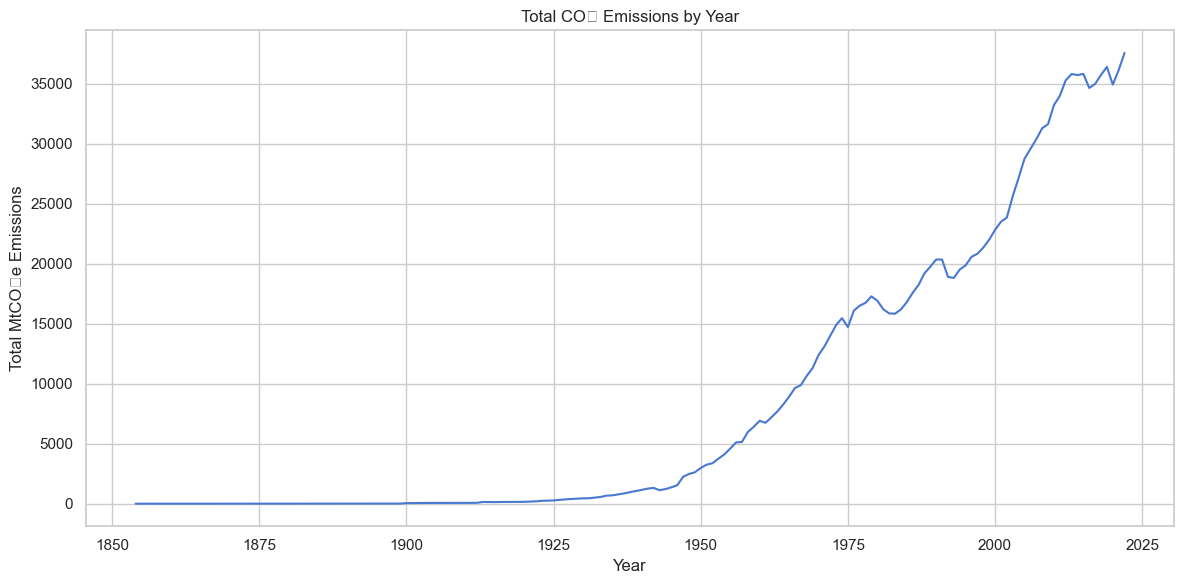

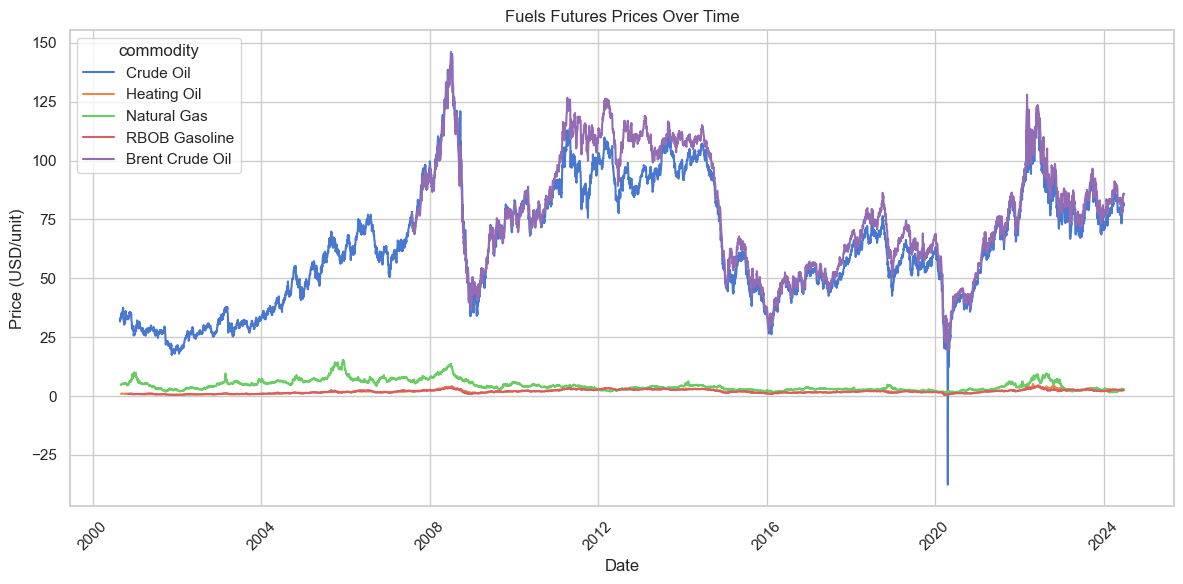

KeyError: 'accident_date/time'

In [47]:
plot_emissions_by_year(df_emissions)
plot_fuel_prices(df_fuels)
plot_pipeline_accidents(df_accidents)
plot_emissions_vs_price(df_emissions, df_fuels)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.